In [1]:
%pylab inline
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4, ErrorCode, Variable
import cartopy
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import math as math
import matplotlib.animation as animation
sys.path.insert(1, '../../functions/')
from ParticlePlotFunctions import *
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load particle data

#namefile = '../../input/particles/Unbeaching_200810_UnBeachingVel.nc'
#Traj_UV = ReadTrajectories(namefile)
#namefile = '../../input/particles/Unbeaching_200810_PrevPosition.nc'
#Traj_Pos = ReadTrajectories(namefile)
namefile = '../../input/particles/Unbeaching_200810_Test.nc'
Traj_test = ReadTrajectories(namefile)

In [3]:
Ufiles = '../../input/modelfields/MITgcm4km/RGEMS_2008_Surf.nc'
Xfiles = '../../input/modelfields/MITgcm4km/RGEMS3_Surf_grid.nc'

date = 200

dfile = Dataset(Ufiles)
Uvel = dfile.variables['UVEL'][date,:,:]
Vvel = dfile.variables['VVEL'][date,:,:]
dfile = Dataset(Xfiles)
bathy = dfile.variables['maskC'][0,:,:]
XG = dfile.variables['XG'][:]
YG = dfile.variables['YG'][:]
XC = dfile.variables['XC'][:]
YC = dfile.variables['YC'][:]

In [ ]:
pbeached = []
beachCount = Traj_UV['unbeachCount'][:]
beachCount[isnan(beachCount)]=0
for p in range(Traj_UV['lon'].shape[0]):
    indexloc = np.where(beachCount[p,:] != 0)[0]
    if indexloc.any():
        pbeached.append(p)
print(len(pbeached)/beachCount.shape[0]*100)


In [ ]:
i = pbeached[100]
map_extent = [-95,-87.5,-2,1]  
#map_extent = [-91.5,-91.3,-0.75,-0.7] 
Clandmask = np.where(bathy==0)
Clon = XC[Clandmask[1][:]]
Clat = YC[Clandmask[0][:]]

fig, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].scatter(Clon,Clat,s=40,c='k')
ax[0].plot(Traj_UV['lon'][i,:],Traj_UV['lat'][i,:],'k')
ax[0].scatter(Traj_UV['lon'][i,:],Traj_UV['lat'][i,:],c='k')
ax[0].set_xlim(map_extent[0:2])
ax[0].set_ylim(map_extent[2:4])
ax[0].set_title('unbeach by distance from coast')

ax[1].scatter(Clon,Clat,s=40,c='k')
ax[1].plot(Traj_Pos['lon'][i,:],Traj_Pos['lat'][i,:],'r')
ax[1].scatter(Traj_Pos['lon'][i,:],Traj_Pos['lat'][i,:],c='r')
ax[1].set_xlim(map_extent[0:2])
ax[1].set_ylim(map_extent[2:4])
ax[1].set_title('unbeach by previous position')


3.5608308605341246


(-2.0, 1.0)

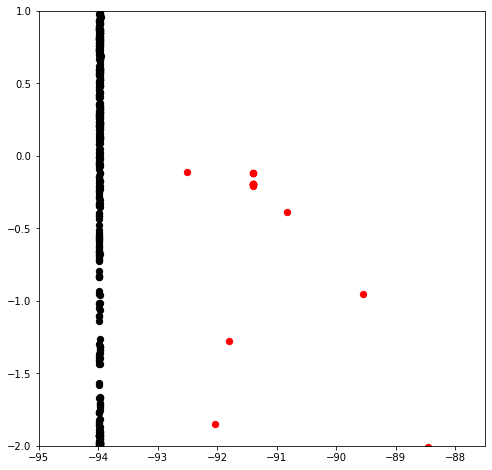

In [4]:
Traj = Traj_test
endloc1 = np.zeros((2,Traj['lon'].shape[0]))
endloc2 = np.zeros((2,Traj['lon'].shape[0]))
particlelong = []

for p in range(Traj['lon'].shape[0]):
    indexloc = np.where(isnan(Traj['lon'][p,:]))[0]
    if indexloc.any():
        endloc1[0,p]=Traj['lon'][p,indexloc[0]-1]
        endloc1[1,p]=Traj['lat'][p,indexloc[0]-1]
    else:
        endloc2[0,p]=Traj['lon'][p,-1]
        endloc2[1,p]=Traj['lat'][p,-1]
        particlelong.append(p)
print(len(particlelong)/p*100)

map_extent = [-95,-87.5,-2,1]      
fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(endloc1[0,:],endloc1[1,:],s=40,c='k')
ax.scatter(endloc2[0,:],endloc2[1,:],s=40,c='r')
ax.set_xlim(map_extent[0:2])
ax.set_ylim(map_extent[2:4])

In [73]:
beached = []
for p in particlelong:
    if Traj['lat'][p,-1]==Traj['lat'][p,-2]:
        beached.append(p)
print(beached)

[113, 114, 116, 117, 118, 133, 136, 137, 138, 156, 159, 176, 196, 433, 667]


[ 1.1151021e-08  2.6449030e-09 -2.7833922e-09 -8.4161114e-09
 -1.5733280e-08 -2.6364516e-08 -4.0551697e-08 -5.2383577e-08
 -6.8078386e-08 -8.9017583e-08]


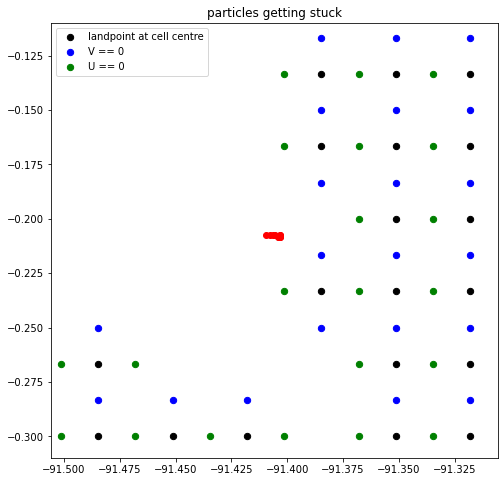

In [90]:
i = beached[10]
#map_extent = [-95,-87.5,-2,1]  
map_extent = [Traj['lon'][i,-1]-0.1,Traj['lon'][i,-1]+0.1,Traj['lat'][i,-1]-0.1,Traj['lat'][i,-1]+0.1] 
Clandmask = np.where(bathy==0)
Clon = XC[Clandmask[1][:]]
Clat = YC[Clandmask[0][:]]
Ulandmask = np.where(Uvel==0)
Ulon = XG[Ulandmask[1][:]]
Ulat = YC[Ulandmask[0][:]]
Vlandmask = np.where(Vvel==0)
Vlon = XC[Vlandmask[1][:]]
Vlat = YG[Vlandmask[0][:]]

fig, ax = plt.subplots(1,figsize=(8,8))
ax.plot(Traj['lon'][i,-70:-60],Traj['lat'][i,-70:-60],'r')
ax.scatter(Traj['lon'][i,-70:-60],Traj['lat'][i,-70:-60],c='r')
ax.scatter(Clon,Clat,s=40,c='k', label = 'landpoint at cell centre')
ax.scatter(Vlon,Vlat,s=40,c='b', label = 'V == 0')
ax.scatter(Ulon,Ulat,s=40,c='g', label = 'U == 0')
ax.set_xlim(map_extent[0:2])
ax.set_ylim(map_extent[2:4])
ax.set_title('particles getting stuck')
ax.legend()
#print(Traj['uvel'][i,np.where(Traj['vvel'][i,:]==0)[0]])
print(Traj['uvel'][i,-70:-60])

In [ ]:
beached = []
for p in particlelong:
    if Traj_UV['lat'][p,-1]==Traj_UV['lat'][p,-2]:
        beached.append(p)
print(len(beached)/beachCount.shape[0]*100)

In [ ]:
print(range(particlelong))